In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
sns.set_style("ticks")
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
import shutil
from os import listdir
from os.path import join, isfile
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
! pip install XlsxWriter
import xlsxwriter

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Input and select the time you want the dashboard to show

In [5]:
# start and end-date for the donut plots
start_date_donut="2023-07-01"
end_date_donut="2023-07-31"
# start and end-date for the monthly line plot
start_date_linegraph="2022-08-01"
end_date_linegraph="2023-07-31"
# month to be shown in the title
month_for_title="July"


In [6]:
rev_newer=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/revenue_only.csv")
rev_newer["Date Received"] = pd.to_datetime(rev_newer["Date Received"])
rev_newer =rev_newer.set_index("Date Received")

In [7]:
palette1 = ["#797EF6", "#4ADEDE", "#1AA7EC", "#1E2F97"]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} \n ({p:.2f}%)'.format(p=pct,v=val)
    return my_autopct
def weekly_dashbaord(df,df_long,month):
    plt.clf()
    sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
#top 2
    dff=df.groupby("Reporting Country  ↑").sum()
    dff=dff.sort_values("Sales",ascending=False)
    dff.reset_index(inplace=True)
    df_short=dff[0:6]
    rest=dff[6:]
    rest_volume= rest["Product"].sum()
    new_row = {'Reporting Country  ↑': 'Rest', 'Sales': rest_volume}
    dff = df_short.append(new_row, ignore_index=True)
    dff=dff.sort_values("Sales",ascending=False)
    rev_plot=df_long.groupby("Year_Month").sum()
# bottom 2
    ef=df_long.groupby(['Year_Month',"new LIMS Project ID"]).sum()

    eff=df.groupby("new LIMS Project ID").sum()
    eff.reset_index(inplace=True)

  #00
    sns.set_palette(palette1)
    sum_all=dff["Sales"].sum()
    labels =dff["Reporting Country  ↑"]
    sizes = dff["Sales"]
    colors = ["#D4BF8E", "#FFA500", "#FF0000", "#00008B", "#40587C", "#35682D", "#888888"]
    axs[0, 0].pie(sizes,colors=colors,

    textprops = {"fontsize":12,"color":"black"},
    autopct=make_autopct(sizes),
    pctdistance =0.8,
    shadow=False,
      wedgeprops={"linewidth": 2.0, "edgecolor": "white"})
    centre_circle = plt.Circle((0,0),.62,color="white", fc="white",linewidth=1.00)
    axs[0, 0].add_artist(centre_circle)
    axs[0, 0].axis("equal")
    axs[0, 0].text(0, 0, sum_all, fontsize=40, ha='center', va='center')
    axs[0, 0].legend(labels=labels,loc="lower right")
   #axs[0, 0].set_title(f"Commercial Orders by Country\n\n" + "Record count", fontsize=16,weight=900, y=1.02)
    axs[0, 0].set_title(f"Commercial Orders by Country", fontsize=16,weight=900, y=1.02)


    sns.set_palette(palette1)
    g=sns.lineplot(data=rev_plot,x="Year_Month", y="Sales", ax=axs[0, 1]
             ,linewidth=4,marker="o" )
    axs[0,1].tick_params(axis='x', rotation=90)
    axs[0, 1].set_title('Monthly Commercial Volume', fontsize=16,weight=900, y=1.02)
    axs[0, 1].set_ylabel("Monthly volume", fontsize=14,weight=700)
    axs[0, 1].set_xlabel("Time in months", fontsize=14,weight=700)


    sns.set_palette(palette1)
    sns.lineplot(data = ef, x = 'Year_Month', y = "Product",
                     linewidth=4,hue="new LIMS Project ID", ax=axs[1, 1],marker="o" )
    axs[1,1].tick_params(axis='x', rotation=90)
    axs[1, 1].set_title("Commercial Volume by Product", fontsize=16,weight=900, y=1.02)
    axs[1, 1].set_ylabel("Amount of test's sold", fontsize=14,weight=700)
    axs[1, 1].set_xlabel("Time in months", fontsize=14,weight=700)
    axs[1, 1].legend(title='Product type')

    sum_all_2=eff["Sales"].sum()
    labels_2 =eff["new LIMS Project ID"]
    sizes_2 = eff["Sales"]
    axs[1, 0].pie(sizes_2,colors=colors,

    textprops = {"fontsize":12,"color":"black"},
    autopct=make_autopct(sizes_2 ),
    pctdistance =0.8,
    shadow=False,
      wedgeprops={"linewidth": 2.0, "edgecolor": "white"})
    centre_circle = plt.Circle((0,0),.62,color="white", fc="white",linewidth=1.00)
    axs[1, 0].add_artist(centre_circle)
    axs[1, 0].axis("equal")
    axs[1, 0].text(0, 0, sum_all_2, fontsize=40, ha='center', va='center')
    axs[1, 0].legend(labels=labels_2,loc="lower right")
    axs[1, 0].set_title(f"Commercial Orders by Test", fontsize=16,weight=900, y=1.02)


    fig.suptitle(f"Weekly EUAA Dashboard - {month} ",
    fontsize=24, fontweight='bold', y=1.01)
    plt.tight_layout()
    sns.despine()

    images_dir = '/content/drive/MyDrive/Colab Notebooks/weekly dashboards'
    filename=f"weekly dashboard_{month}.pdf"
    plt.savefig(f"{images_dir}/{filename}", dpi = 300,pad_inches = 1, bbox_inches ="tight")



<Figure size 640x480 with 0 Axes>

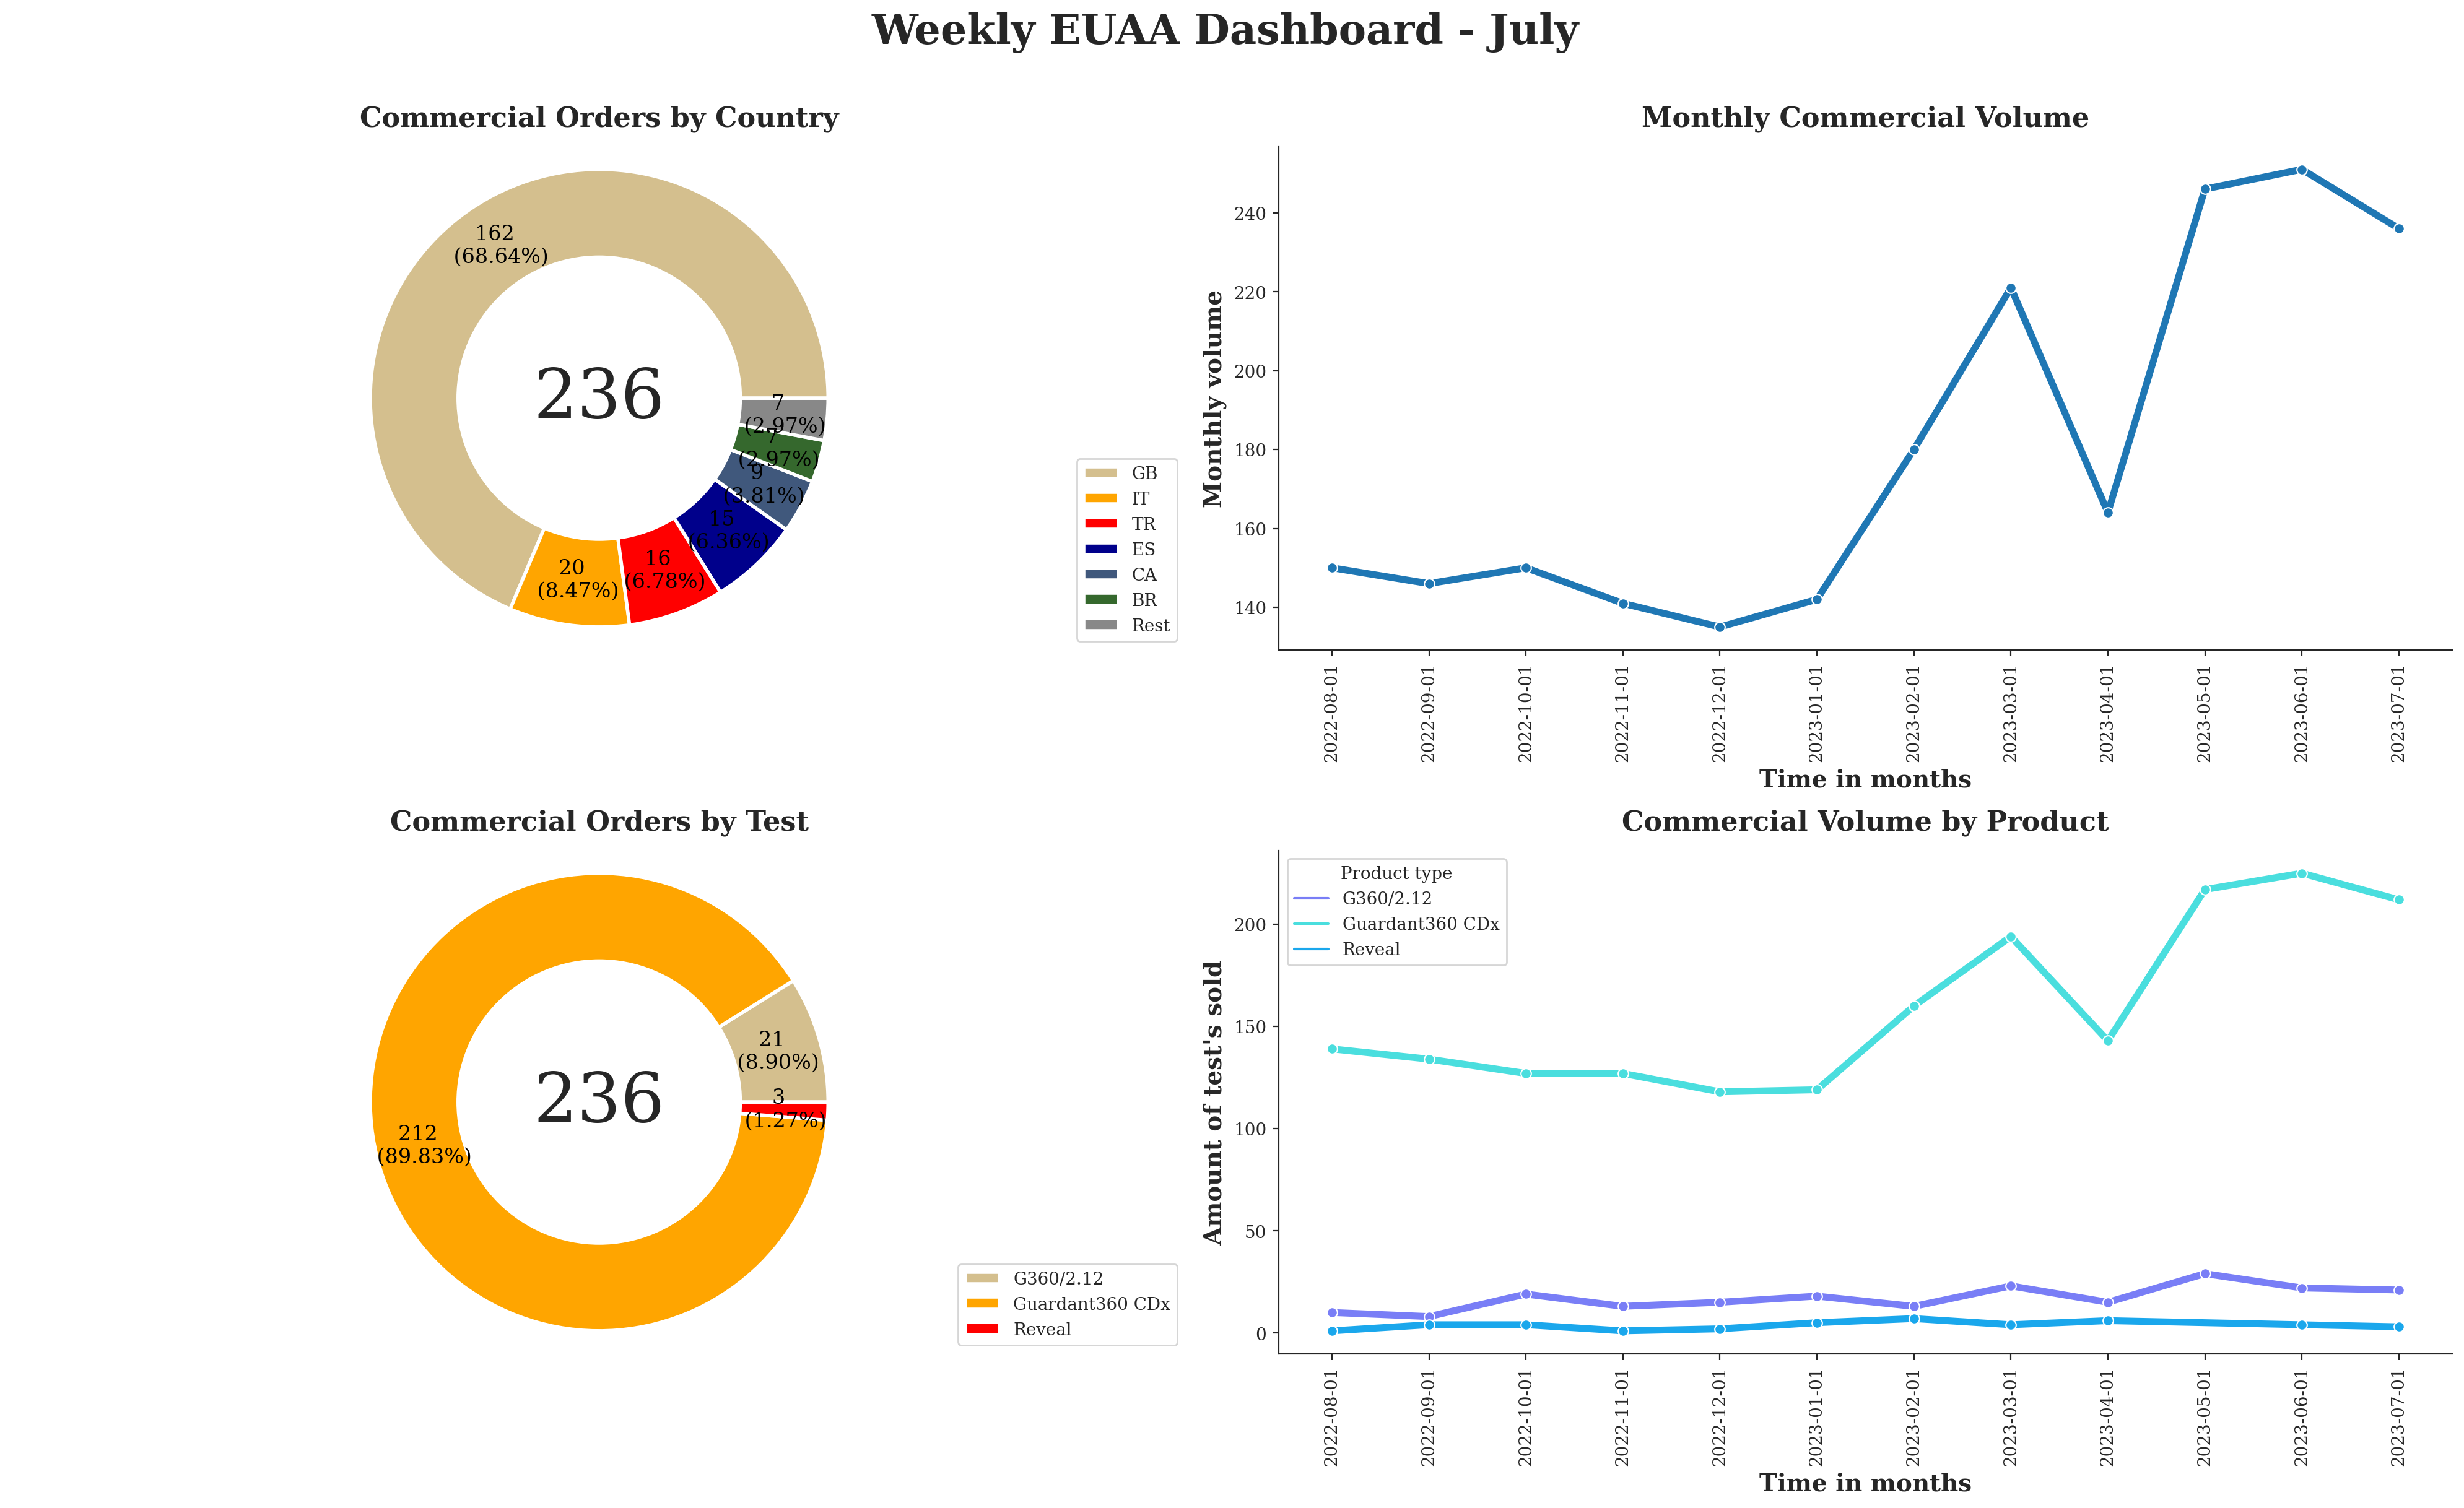

In [8]:

aff= rev_newer.loc[start_date_linegraph:end_date_linegraph]
df=rev_newer.loc[start_date_donut:end_date_donut]
weekly_dashbaord(df,aff,month_for_title)

In [9]:
e

NameError: ignored